<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


## Load the data

In [2]:
X = pd.read_csv('creditcard.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)

print(X.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

## Pre-process the data

In [3]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


## Reduce the dimensionality of the data using PCA

In [4]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())


         P1        P2
0 -0.489949 -0.679977
1 -0.519099  0.544827
2  0.330633  0.268881
3 -0.481656 -0.097608
4 -0.563512 -0.482506


## Train a DBSCAN model using default values

In [5]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN().fit(X_principal)
labels = db_default.labels_

In [6]:
set(labels)

{0}

## Plot the clustered data

In [7]:
from sklearn import metrics

# Building the label to colour mapping
def scatter_plot(labels):
    print(metrics.silhouette_score(X_principal, labels))

    colours = {}
    colours[0] = 'r'
    colours[1] = 'g'
    colours[2] = 'b'
    colours[-1] = 'k'

# Building the colour vector for each data point
    cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
    r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
    g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
    b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
    k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
    plt.figure(figsize =(9, 9))
    plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

# Building the legend
    plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

    plt.show()
    
# scatter_plot(labels)


1. Train a DBSCAN model

In [8]:
X_principal.shape

(8950, 2)

4
[[0.         0.02032627 0.02064421 0.034701  ]
 [0.         0.00512242 0.00977759 0.01414944]
 [0.         0.00420753 0.01607617 0.01793904]
 ...
 [0.         0.01135478 0.01423335 0.01572023]
 [0.         0.00423136 0.00853724 0.01737405]
 [0.         0.00564884 0.00867056 0.01503602]]


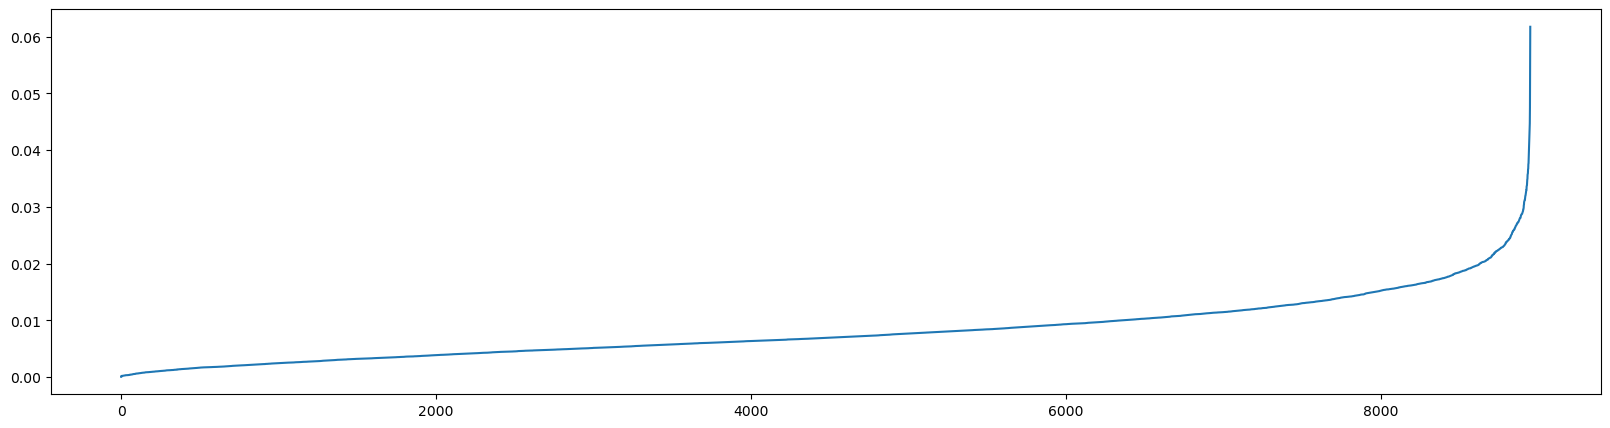

In [12]:
from sklearn.neighbors import NearestNeighbors

print(X_principal.shape[1]*2)
neighbors = NearestNeighbors(n_neighbors=X_principal.shape[1]*2)
nfit = neighbors.fit(X_principal)
distance, indices = nfit.kneighbors(X_principal)
print(distance)
distances = np.sort(distance, axis=0)

plt.figure(figsize=(20,5))
plt.plot(distances[:, 1])

{0, -1}
1
0.19450774803164114


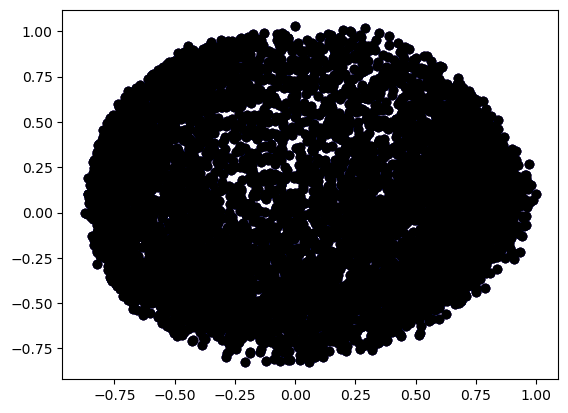

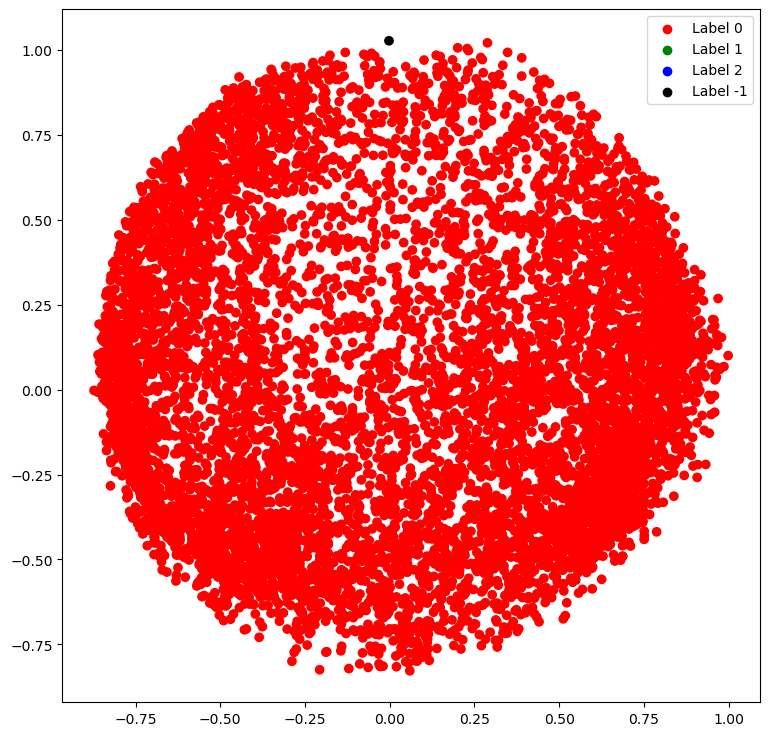

In [11]:
# put your answer here

# eps=0.25, min_samples=800 0.41 NEW
# eps=0.266, min_samples=900 0.42
# 0.436 ~~ eps=0.37, min_samples=1700
# 0.4378144267209542
# # print(X_principal)
db_scan_trained1 = DBSCAN(eps=0.06, min_samples=4).fit(X_principal)
labels = db_scan_trained1.labels_
labels
print(set(labels))
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters)
scatter_plot(labels)

In [779]:
len(set(labels))

2

0.4484059953447882


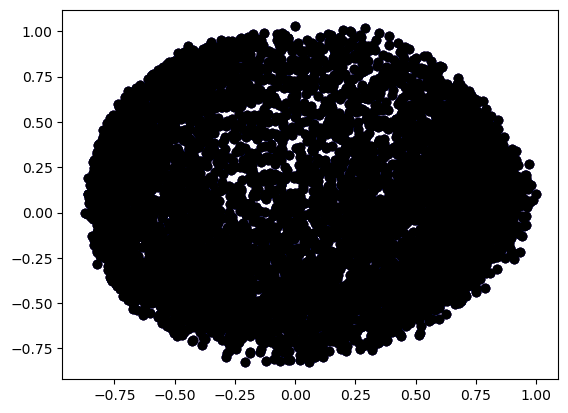

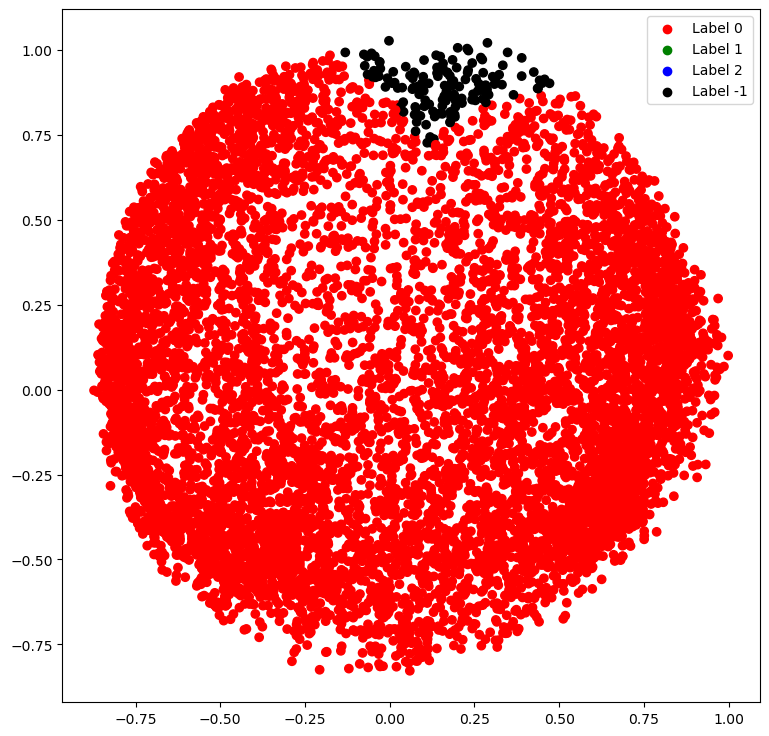

2. Plot the clustered data

In [60]:
#put your answer here

3. Print the number of clusters

In [ ]:
#put your answer here

4. Print the number of noisy data

In [ ]:
#put your answer here

5. Print the silhouette score

In [61]:
#put your answer here